In [9]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 20)

from scipy import optimize
from scipy import integrate

data_path = '../data/processed/COVID_relational_confirmed.csv'
df_list = pd.read_csv(data_path)

df_model=pd.crosstab(df_list['date'],df_list['location'],values=df_list['confirmed'],aggfunc=np.mean)
country_list = ['India', 'Germany', 'Italy', 'France', 'Russia']
df_final=df_model[country_list].dropna()
#df_final.tail()
df_final.to_csv('../data/raw/COVID_SIR.csv',index=True)

data_path = '../data/raw/COVID_SIR.csv'
df_analyse = pd.read_csv(data_path)
df_analyse.set_index='index'


# Data set cleaned for Covid-19 modelling

the file COVED_small_flat_table has to be generated via the NOTEBOOK DATA PREPARATION

Goal of the exercise a dynamic dashboard of the last cell in the notebook, where one can select the fit for different countries

Fit of SIR model for Germany cases


In [24]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format


df_analyse=pd.read_csv('../data/raw/COVID_SIR.csv')  
df_analyse.sort_values('date',ascending=True).tail()

,date,India,Germany,Italy,France,Russia
904,2022-07-23,43888755.0,30331133.0,20608190.0,33475033.0,18254644.0
905,2022-07-24,43905621.0,30331133.0,20660065.0,33475033.0,18262088.0
906,2022-07-25,43920451.0,30476605.0,20684182.0,33604792.0,18268570.0
907,2022-07-26,43938764.0,30598385.0,20772833.0,33692580.0,18274674.0
908,2022-07-27,43938764.0,30702511.0,20837233.0,33751218.0,18283628.0


In [25]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

In [7]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


# Simulative approach to calculate SIR curves

In [10]:

SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


/var/folders/d8/72n_692j3z70ffwslnyqdyx80000gn/T/ipykernel_3381/3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
/var/folders/d8/72n_692j3z70ffwslnyqdyx80000gn/T/ipykernel_3381/3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
/var/folders/d8/72n_692j3z70ffwslnyqdyx80000gn/T/ipykernel_3381/3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
/var/folders/d8/72n_692j3z70ffwslnyqdyx80000gn/T/ipykernel_3381/3919566462.py:14: FutureWarning: The frame.append method is deprecated and will be remo

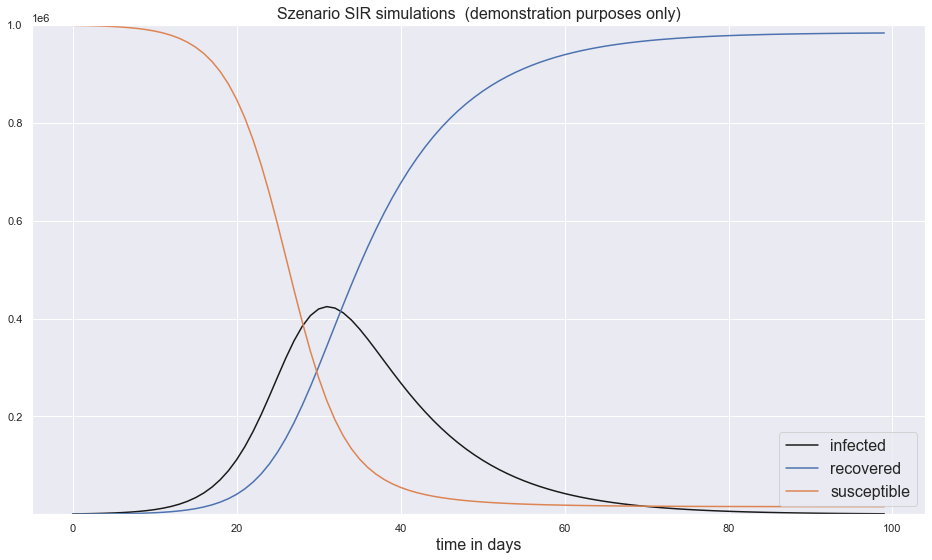

In [11]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters of SIR model

In [45]:


ydata = np.array(df_analyse.Germany[35:])
t=np.arange(len(ydata))
#df_analyse.Germany[:]

0             5.0
1             8.0
2            10.0
3            12.0
4            12.0
          ...    
904    30331133.0
905    30331133.0
906    30476605.0
907    30598385.0
908    30702511.0
Name: Germany, Length: 909, dtype: float64

In [13]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.4

In [14]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [56]:


def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [57]:
# example curve of our differential equationa
popt=[0.4,0.1]
fit_odeint(t, *popt)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [18]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

In [17]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])



standard deviation errors :  [2.05524575e-02 3.11295541e-05]  start infect: 534.0
Optimal parameters: beta = 0.20608171331916808  and gamma =  -0.004023648024592988


/var/folders/d8/72n_692j3z70ffwslnyqdyx80000gn/T/ipykernel_3381/649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
/var/folders/d8/72n_692j3z70ffwslnyqdyx80000gn/T/ipykernel_3381/649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
/var/folders/d8/72n_692j3z70ffwslnyqdyx80000gn/T/ipykernel_3381/649699423.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I


In [18]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

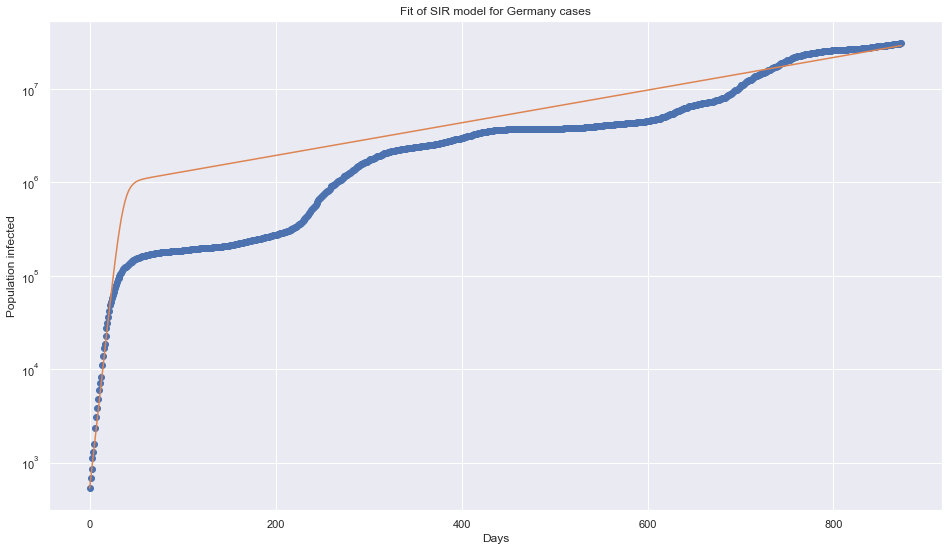

Optimal parameters: beta = 0.20608171331916808  and gamma =  -0.004023648024592988
Basic Reproduction Number R0  -51.217629389940065
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [19]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

In [58]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'
country_list = [ 'Germany', 'Italy', 'France', 'India','Russia']
N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate

df_list=pd.read_csv('../data/raw/COVID_SIR.csv')

df_data=df_list[80:180]
t=np.arange(df_data.shape[0])

R0=0

#df_data = df_data.drop(['date'],axis=1).diff().fillna(0)

for country in country_list:
    y_data=np.array(df_data[country])#[df_data[country]>0][country])
    t=np.arange(len(y_data))
    
    I0=y_data[0]
    S0=N0-I0
    popt=[0.4,0.1]
    fit_odeint(t,*popt)
    popt,pcov = optimize.curve_fit(fit_odeint,t,y_data,maxfev=5000)
    perr= np.sqrt(np.diag(pcov))
    fitted=fit_odeint(t,*popt)
    fitted_pad= np.concatenate((np.zeros(df_data.shape[0]-len(fitted)),fitted))
    df_data[country+'_fitted']=fitted_pad


df_data=df_data.reset_index(drop=True)
df_data.to_csv('../data/processed/SIR_fitted_curve.csv')


/var/folders/d8/72n_692j3z70ffwslnyqdyx80000gn/T/ipykernel_3381/3841505610.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data[country+'_fitted']=fitted_pad
/var/folders/d8/72n_692j3z70ffwslnyqdyx80000gn/T/ipykernel_3381/3841505610.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data[country+'_fitted']=fitted_pad
/var/folders/d8/72n_692j3z70ffwslnyqdyx80000gn/T/ipykernel_3381/3841505610.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [52]:
import missingno as mno
#mno.matrix(df_data)
#np.array(
df_data['India']

80       18539.0
81       20080.0
82       21370.0
83       23077.0
84       24530.0
         ...    
175    1337024.0
176    1385635.0
177    1435616.0
178    1480073.0
179    1531669.0
Name: India, Length: 100, dtype: float64

In [59]:
df_data.head()

,date,India,Germany,Italy,France,Russia,Germany_fitted,Italy_fitted,France_fitted,India_fitted,Russia_fitted
0,2020-04-20,18539.0,141672.0,181228.0,154327.0,47121.0,141672.000000,181228.000000,154327.000000,18539.000000,47121.000000
1,2020-04-21,20080.0,143457.0,183957.0,156993.0,52763.0,171662.002368,182800.365827,192768.739698,19535.355133,50040.066103
2,2020-04-22,21370.0,145694.0,187327.0,158791.0,57999.0,177779.481718,184363.604197,216830.568714,20584.752869,53128.113956
3,2020-04-23,23077.0,148046.0,189973.0,157082.0,62773.0,161014.523176,185917.175086,220950.031472,21689.961454,56393.423069
4,2020-04-24,24530.0,150383.0,192994.0,159893.0,68622.0,131835.455737,187460.539334,207100.204876,22853.887519,59844.488513
